In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)

In [3]:
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [5]:
data.columns = header

In [6]:
data.index = [1,2,3,4,5,6,7,8,9,10,11]

In [7]:
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [8]:
#data.to_latex('hola.tex')

In [9]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


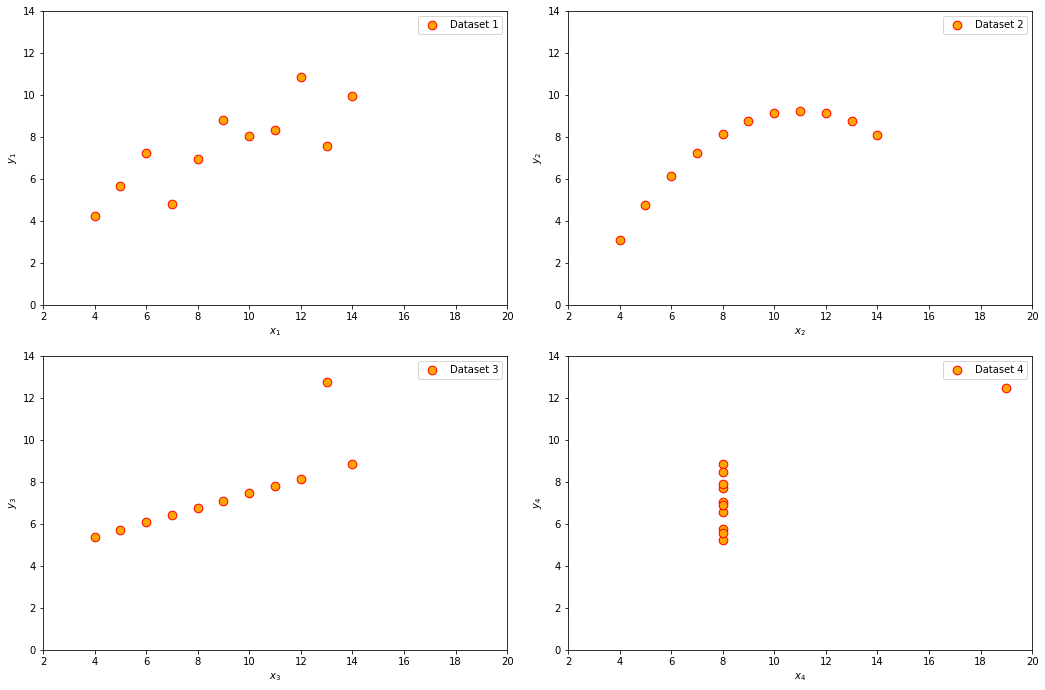

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred

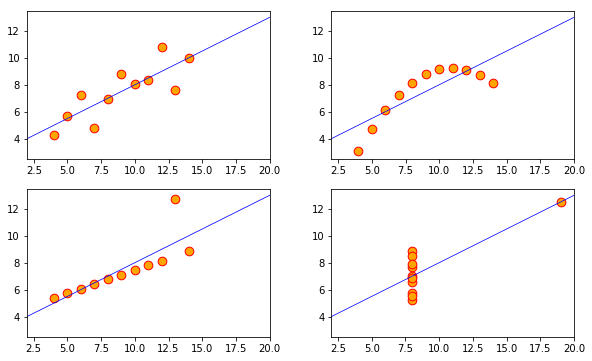

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2

7. <div style="text-align: justify">  Completar el notebook "Anscombe.ipynb" con lo siguiente: 
    (A) Su punto de vista del artículo mencionado en el punto 1 (particularmente de la sección 3); 
    (B) Realizar los cálculos descritos en la transparencia 11 de la presentación Intro. a la Vis. (página 11); 
    (C) "Retocar" los gráficos para que se muestre la información que es necesaria (etiquetas en los ejes, títulos, leyendas, tipo de marcadores, colores, etc). </div>
8. <div style="text-align: justify"> Realizar todo lo anterior en Python 3.7 usando notebooks de Jupyter y subirlos a SU REPOSITORIO DEL CURSO EN GITHUB.</div>
9. <div style="text-align: justify"> Indicar que la tarea está lista por este medio y poner el link de los notebooks correspondientes.</div>


<div style="text-align: justify">7(A). Creo que el artículo, a pesar de solamente hablar de regresión está muy completo al considerar y mencionar la regresión lineal simple y la regresión lineal múltiple. También muestra adecuadamente que una "two-way table" es una tabla estadística que muestra el número o la frecuencia observada para dos variables; las filas que indican una categoría y las columnas que indican la otra categoría.</div><br>
    
<div style="text-align: justify">Inicialmente recalca la utilidad de las gráficas, lo cual muestra en el punto 3. Además, menciona los tipos análisis estadísticos al realizar regresión, estos son muy importantes resúmenes con números significativos. La información de diversos datos puede ser condensada en unos cuantos números, lo que nos permite tomar decisiones. Define además la observación en términos del valor ajustado (obtenido mediante los datos) y el residuo. </div> <br>
    
<div style="text-align: justify">En la parte 3, nos podemos dar cuenta de que las gráficas son muy importantes para visualizar la información; pues el autor brinda cuatro conjunto de datos, en los que aunque todos mantienen la misma salida estándar de un programa típico de regresión; podemos observar gráficamente que todas mantienen diferentes características. Los datos de la gráfica superior izquierda presentan una dispersión general; los de la gráfica en la esquina superior derecha muestran una tendencia no lineal (cuadrática); los de la gráfica en la esquina inferior izquierda parece que forman una línea recta, con un posible valor atípico; y los de la gráfica en la esquina inferior derecha tienen una tendencia de línea vertical con un posible valor atípico.</div><br>



<div style="text-align: justify"> Por lo tanto, es de suma importancia obtener una visualización correcta de la forma en que se distribuyen los datos, mediante una gráfica, en donde podamos interpretar de mejor manera la información. </div>

7 (B).

In [15]:
import statistics as stats

corr = np.corrcoef(data['$x_1$'], data['$y_1$'])

print("La media de x es:", stats.mean(data['$x_1$']))
print("La varianza de x es:", stats.variance(data['$x_2$']))
print("La media de y es:", stats.mean(data['$y_3$']))
print("La varianza de y es:", stats.variance(data['$y_3$']))
print("La correlación entre x & y es:",corr[0][1])


La media de x es: 9.0
La varianza de x es: 11.0
La media de y es: 7.5
La varianza de y es: 4.12262
La correlación entre x & y es: 0.81642051634484


#### Realizamos la regresión lineal de otra forma 

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = data[["$x_1$"]]
X_train = np.array(dataX)
y_train = data['$y_1$'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficiente: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independente: \n', regr.intercept_)
# Error Cuadrado Medio
print("Error cuadrático medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coeficiente de determinación de la regresión lineal (R2): %.2f' % r2_score(y_train, y_pred))

Coeficiente: 
 [0.50009091]
Término independente: 
 3.0000909090909094
Error cuadrático medio: 1.25
Coeficiente de determinación de la regresión lineal (R2): 0.67


(C) "Retocar" los gráficos para que se muestre la información que es necesaria (etiquetas en los ejes, títulos, leyendas, tipo de marcadores, colores, etc). 

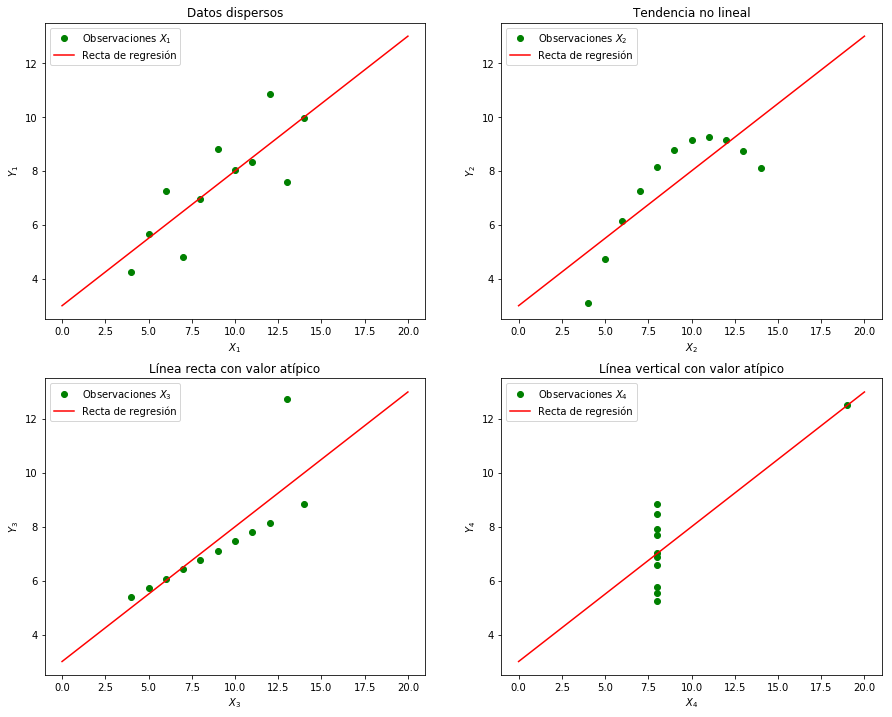

In [17]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(nrows=2, ncols=2, figsize=(15,12))
import numpy as np
a[0][0].plot(data['$x_1$'], data['$y_1$'], 'go', X_pred, Y_pred, 'r-')
a[0][0].set_title('Datos dispersos')
a[0][0].legend(('Observaciones $X_1$','Recta de regresión'),loc='upper left')
a[0][0].set_xlabel('$X_1$')
a[0][0].set_ylabel('$Y_1$')
a[0][1].plot(data['$x_2$'], data['$y_2$'], 'go', X_pred, Y_pred, 'r-')
a[0][1].set_title('Tendencia no lineal')
a[0][1].legend(('Observaciones $X_2$','Recta de regresión'),loc='upper left')
a[0][1].set_xlabel('$X_2$')
a[0][1].set_ylabel('$Y_2$')
a[1][0].plot(data['$x_3$'], data['$y_3$'], 'go', X_pred, Y_pred, 'r-')
a[1][0].set_title('Línea recta con valor atípico') 
a[1][0].legend(('Observaciones $X_3$','Recta de regresión'),loc='upper left')
a[1][0].set_xlabel('$X_3$')
a[1][0].set_ylabel('$Y_3$')
a[1][1].plot(data['$x_4$'], data['$y_4$'], 'go', X_pred, Y_pred, 'r-')
a[1][1].set_title('Línea vertical con valor atípico')
a[1][1].legend(('Observaciones $X_4$','Recta de regresión'),loc='upper left')
a[1][1].set_xlabel('$X_4$')
a[1][1].set_ylabel('$Y_4$')
plt.show()